In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
#loading the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#checking if there is duplicate data
train_data.duplicated().sum()

0

In [8]:
#identify missing values percentage in train data
(train_data.isna().sum())/len(train_data)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
#identify missing values percentage in train data
(test_data.isna().sum())/len(test_data)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [10]:
train_data.drop(columns=['Cabin'],inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)

In [11]:
mode=train_data['Embarked'].mode
train_data['Embarked'].fillna(mode,inplace=True)

In [12]:
mean=train_data['Age'].mean
train_data['Age'].fillna(mean,inplace=True)

In [13]:
#check missing values percentage in data
(train_data.isna().sum())/len(train_data)*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [14]:
train_data.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [15]:
#"0" represent not survive and "1" represent survive
train_data.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<Axes: ylabel='Pclass'>

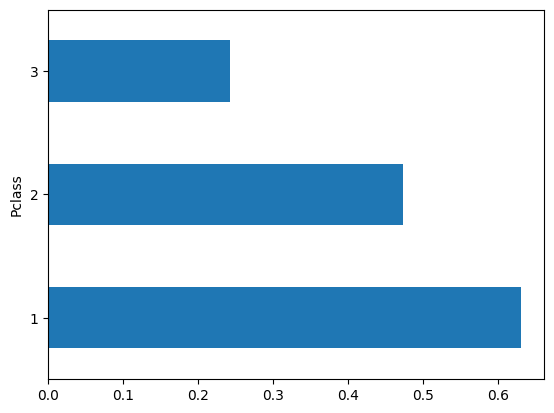

In [16]:
#Bivariate Exploratory Data Analysis
#plotting the columns vs Survived graphs for analysis

#fig, axes = plt.subplots(2, 4, figsize=(16, 10))

train_data.groupby('Pclass')['Survived'].mean().plot(kind='barh')


<Axes: ylabel='SibSp'>

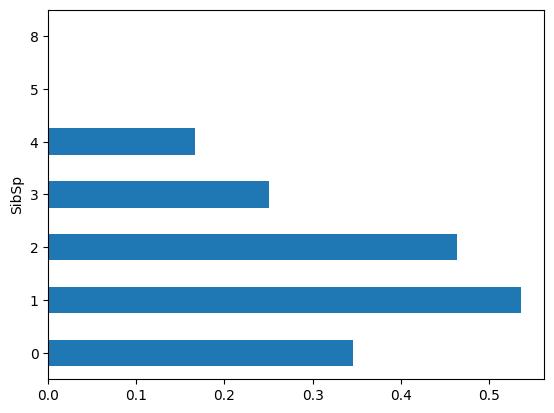

In [17]:
train_data.groupby('SibSp')['Survived'].mean().plot(kind='barh')

<Axes: ylabel='Parch'>

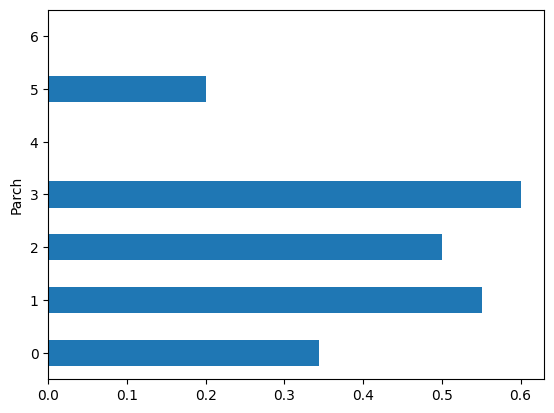

In [18]:
train_data.groupby('Parch')['Survived'].mean().plot(kind='barh')

<Axes: ylabel='Sex'>

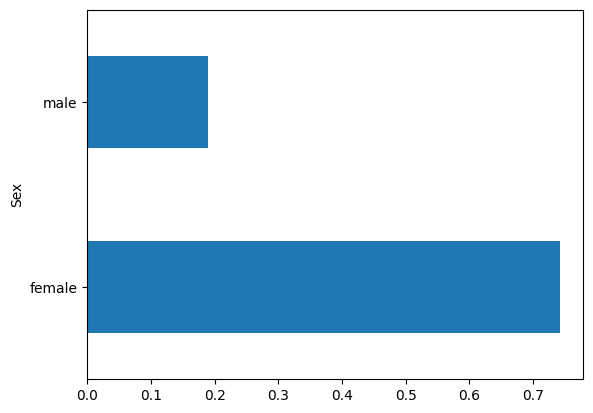

In [19]:
train_data.groupby('Sex')['Survived'].mean().plot(kind='barh')

<Axes: ylabel='Embarked'>

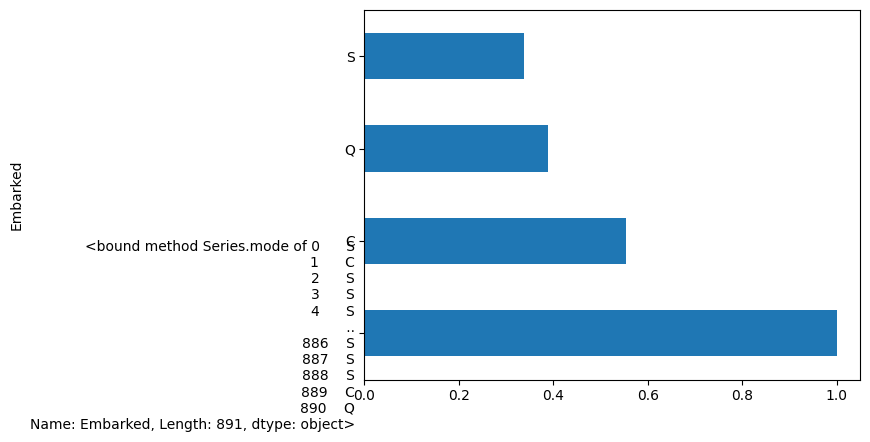

In [20]:
train_data.groupby('Embarked')['Survived'].mean().plot(kind='barh')

In [21]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [22]:
#This will coerce all non-numeric values to NaN, which will then be flagged as False using notnull(). Other numeric values will be converted to True
train_data=train_data[pd.to_numeric(train_data['Age'], errors='coerce').notnull()]

<Axes: title={'center': 'survive rate vs Age'}, xlabel='Age', ylabel='Survived'>

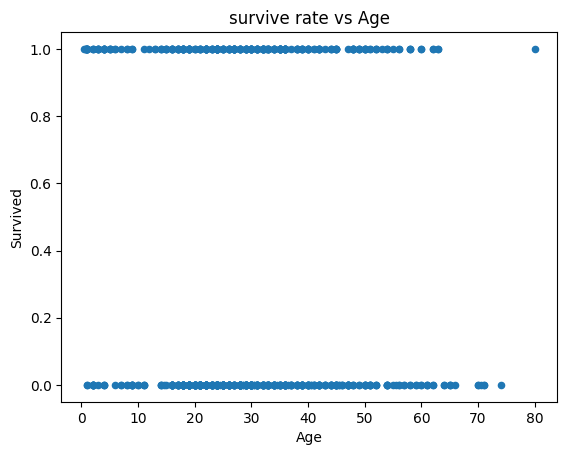

In [23]:
train_data.plot.scatter(x="Age",y="Survived",title="survive rate vs Age")


<Axes: xlabel='Survived', ylabel='Age'>

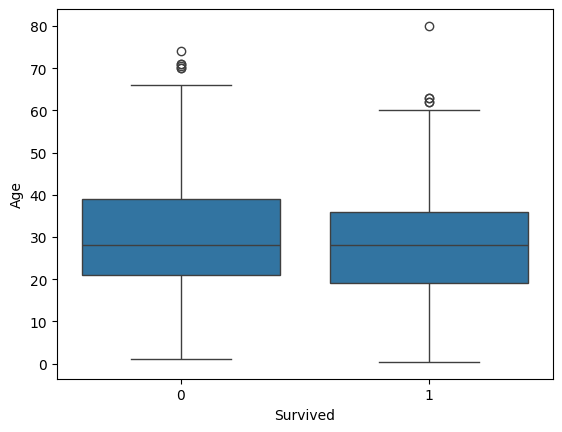

In [24]:
sns.boxplot(x="Survived", y="Age", data=train_data)

<Axes: xlabel='Survived', ylabel='Fare'>

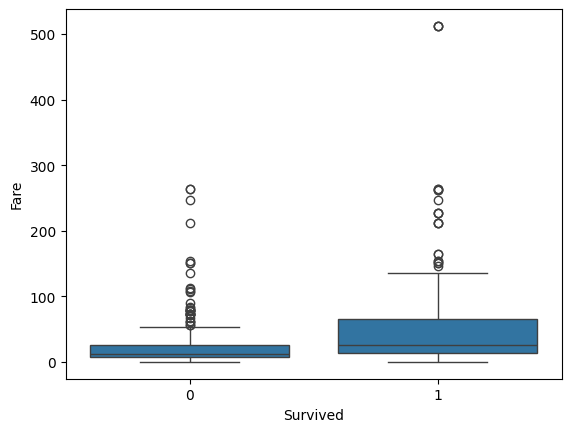

In [25]:
sns.boxplot(x="Survived", y="Fare", data=train_data)

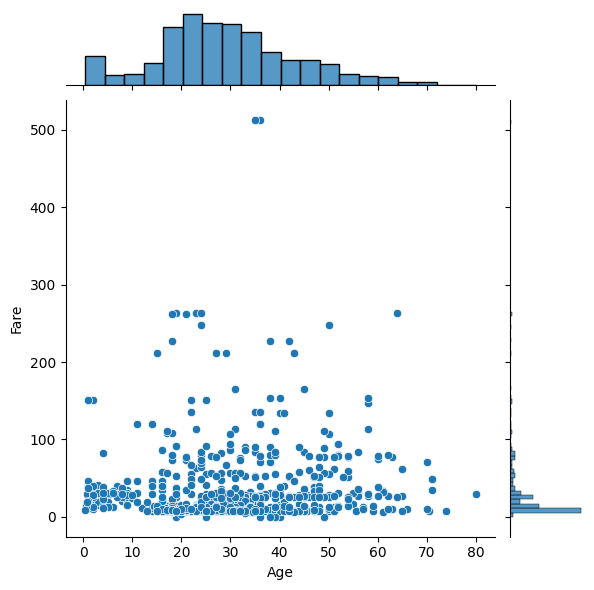

In [26]:
sns.jointplot(x="Age", y="Fare", data=train_data)

<ipython-input-27-e5d72da57ffe>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_data.corr()
<ipython-input-27-e5d72da57ffe>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr, dtype=np.bool),


<Axes: >

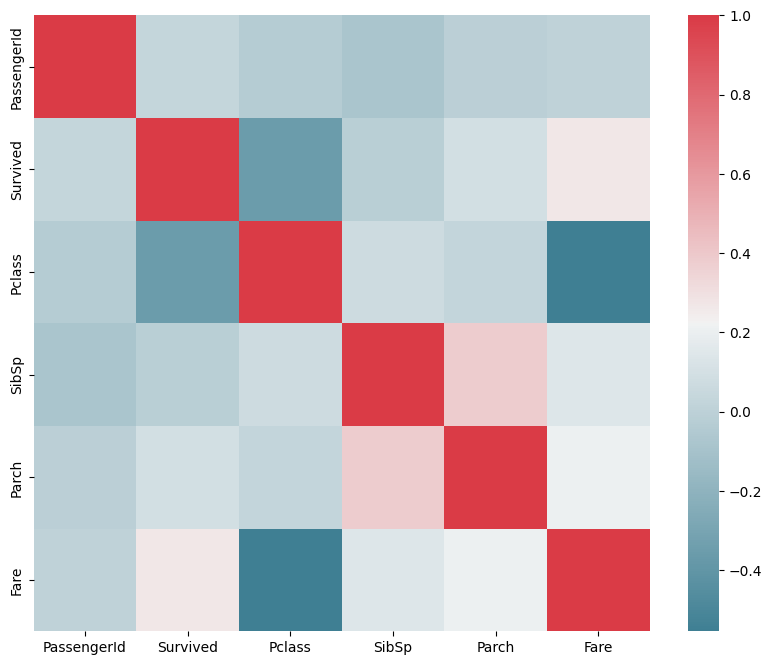

In [27]:
#multivariate Exploratory Data Analysis
#plot sns heatmap
f, ax = plt.subplots(figsize=(10, 8))
corr = train_data.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [36]:
# Import Estimator AND Instantiate estimator class to create an estimator object
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()

In [38]:
#prediction of survived on base of age
X_Age = train_data[['Age']].values
y = train_data['Survived'].values
# Use the fit method to train
lr.fit(X_Age,y)
# Make a prediction
y_predict = lr.predict(X_Age)
y_predict[:10]
score = accuracy_score(y, y_predict)
print(score)

0.5938375350140056


In [39]:
#prediction of survived on base of fare
X_Fare = train_data[['Fare']].values
y = train_data['Survived'].values
# Use the fit method to train
lr.fit(X_Fare,y)
# Make a prediction
y_predict = lr.predict(X_Fare)
y_predict[:10]
score = accuracy_score(y, y_predict)
print(score)

0.6694677871148459


In [40]:
#prediction of survived on base of sex
X_sex = pd.get_dummies(train_data['Sex']).values
y = train_data['Survived'].values
# Use the fit method to train
lr.fit(X_sex, y)
# Make a prediction
y_predict = lr.predict(X_sex)
y_predict[:10]
score = accuracy_score(y, y_predict)
print(score)

0.7801120448179272


In [42]:
#prediction of survived on base of Pclass
X_pclass = pd.get_dummies(train_data['Pclass']).values
y = train_data['Survived'].values
lr = LogisticRegression()
lr.fit(X_pclass, y)
# Make a prediction
y_predict = lr.predict(X_pclass)
y_predict[:10]
score = accuracy_score(y, y_predict)
print(score)

0.6750700280112045


In [44]:
#Predicting Survival based on Random forest model
from sklearn.ensemble import RandomForestClassifier
X=train_data[['Age', 'SibSp', 'Parch',
       'Fare']].values # Taking all the numerical values
y = train_data['Survived'].values
RF = RandomForestClassifier()
RF.fit(X, y)
# Make a prediction
y_predict = RF.predict(X)
y_predict[:10]
score = accuracy_score(y, y_predict)
print(score)

0.9761904761904762


In [63]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)